In [7]:
import pandas as pd
likes=[8851,2812,151264,226841,298983]
df=pd.read_csv('Data mining - Sheet2.csv')
df.head()

,YOUTUBE LINK,LIKE,DISLIKE,VIEWS
0,https://youtu.be/EboTIyWDuCo?list=PLLy_2iUCG87...,41,1,8851
1,https://youtu.be/yEBKbiadlRE?list=PLLy_2iUCG87...,18,0,2812
2,https://youtu.be/9yl6-HEY7_s?list=PLeo1K3hjS3u...,2500,37,151264
3,https://www.youtube.com/watch?v=oQmxQh92Nh8,5093,63,"226,841"
4,https://www.youtube.com/watch?v=t8JRidxZCXU,"17,000",262,298983


## Faetures
### 1- Brightness


In [11]:
import os
import glob

import cv2
import numpy as np
from PIL import Image
from PIL import ImageStat
import math

import matplotlib.pyplot as plt

def isbright(image, dim=10, thresh=0.5):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return True if mean is greater than thresh else False
    #return np.mean(L) > thresh
    return np.mean(L)
   # print(thresh)

### 2-average pixel brightness

In [19]:
def brightness( im_file ):
   # im = Image.open(im_file).convert('L')
   # stat = ImageStat.Stat(im)
   # return stat.rms[0]
   im = Image.open(im_file)
   stat = ImageStat.Stat(im)
   r,g,b = stat.rms
   return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

In [21]:
shots_brightness_f1=[]
shots_brightness_f2=[]
df_brightness1=[]
df_brightness2=[]
i=0

for j in range(5):
    path, dirs, files = next(os.walk("D:\Project_Like_Prediction\data_"+str(j+1)))
    file_count = len(files)

    i=0
    while(i<file_count):
        
        image1 = cv2.imread("D:\\Project_Like_Prediction\\data_"+str(j+1)+"\\frame"+str(i)+".jpg")
        image2="D:\\Project_Like_Prediction\\data_"+str(j+1)+"\\frame"+str(i)+".jpg"
       
        
        shots_brightness_f1=np.append(shots_brightness_f1,isbright(image1))
        shots_brightness_f2=np.append(shots_brightness_f2,brightness(image2))
        i=i+1
    sum1=0
    sum2=0
    for i in range(file_count):
        sum+=shots_brightness_f1[i]
        sum2+=shots_brightness_f2[i]
    #print(sum)
    df_brightness1=np.append(df_brightness1,shots_brightness_f1.mean())
    df_brightness2=np.append(df_brightness2,shots_brightness_f2.mean())

   # print("Avg Brightness"+str(j+1)+" : "+str(shots_brightness_f1.mean()))
    print("Avg Brightness"+str(j+1)+" : "+str(shots_brightness_f2.mean()))
    
print(df_brightness1)
print(df_brightness2)

Avg Brightness1 : 225.96484588705368
Avg Brightness2 : 224.96338788963374
Avg Brightness3 : 229.873518819486
Avg Brightness4 : 220.8325485007333
Avg Brightness5 : 207.5280208788934
[0.8818442  0.87599052 0.90877151 0.89302967 0.82555788]
[225.96484589 224.96338789 229.87351882 220.8325485  207.52802088]


In [22]:
df['brightness']=df_brightness1
df['brightness2']=df_brightness2
df.head()

,YOUTUBE LINK,LIKE,DISLIKE,VIEWS,brightness,brightness2
0,https://youtu.be/EboTIyWDuCo?list=PLLy_2iUCG87...,41,1,8851,0.881844,225.964846
1,https://youtu.be/yEBKbiadlRE?list=PLLy_2iUCG87...,18,0,2812,0.875991,224.963388
2,https://youtu.be/9yl6-HEY7_s?list=PLeo1K3hjS3u...,2500,37,151264,0.908772,229.873519
3,https://www.youtube.com/watch?v=oQmxQh92Nh8,5093,63,"226,841",0.893030,220.832549
4,https://www.youtube.com/watch?v=t8JRidxZCXU,"17,000",262,298983,0.825558,207.528021


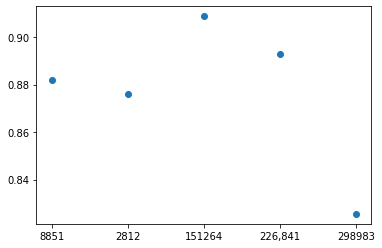

In [15]:
plt.scatter(df.VIEWS,df.brightness)

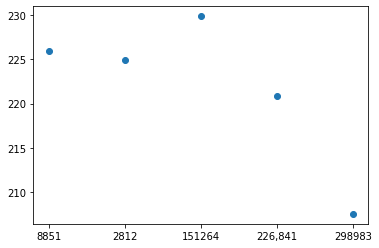

In [23]:
plt.scatter(df.VIEWS,df.brightness2)